In [2]:
# imports
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys
from scipy import ndimage
from skimage import io
from scipy import ndimage
import PIL
from PIL import Image
import pandas as pd
from skimage.io import imshow, imread
from skimage.color import rgb2gray
from skimage import img_as_ubyte, img_as_float
from skimage.exposure import histogram, cumulative_distribution
%matplotlib inline
from IPython.display import display, Math, Latex

In [30]:
# function for displaying image
def display(img):
    plt.figure(figsize=(5,5))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [31]:
def GaussianLowFilter(img):
    
    # transform the image into frequency domain, f --> F
    F = np.fft.fft2(img)
    Fshift = np.fft.fftshift(F)
    
    # Create Gaussin Filter: Low Pass Filter
    M,N = img.shape
    H = np.zeros((M,N), dtype=np.float32)
    D0 = 10
    for u in range(M):
        for v in range(N):
            D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
            H[u,v] = np.exp(-D**2/(2*D0*D0))
            
    # Image Filters
    Gshift = Fshift * H
    G = np.fft.ifftshift(Gshift)
    g = np.abs(np.fft.ifft2(G))
    return g

    
# img= cv2.imread("D:/SBME/3rd Year/First Semster/DSP/DSP_Task4/static/assets/image.jpg")
# g= GaussianLowFilter(img)
# display(g)

In [35]:
#function gray scale 
def rgbtogray(image):
    r,g,b=image[:,:,0],image[:,:,1],image[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

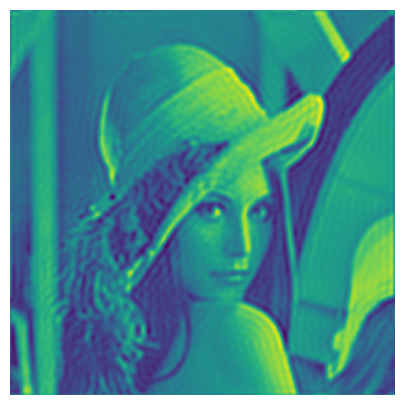

In [38]:
def idealLowPass(img):
        # image in frequency domain
    F = np.fft.fft2(img)
    Fshift = np.fft.fftshift(F)

    # Filter: Low pass filter
    M,N = img.shape
    H = np.zeros((M,N), dtype=np.float32)
    D0 = 50
    for u in range(M):
        for v in range(N):
            D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
            if D <= D0:
                H[u,v] = 1
            else:
                H[u,v] = 0

    # Ideal Low Pass Filtering
    Gshift = Fshift * H

    # Inverse Fourier Transform
    G = np.fft.ifftshift(Gshift)
    g = np.abs(np.fft.ifft2(G))
    return g

img= cv2.imread("C:/Users/mahamedhat/Downloads/lina.jpeg")
img = rgbtogray(img)
g= idealLowPass(img)
display(g)

    

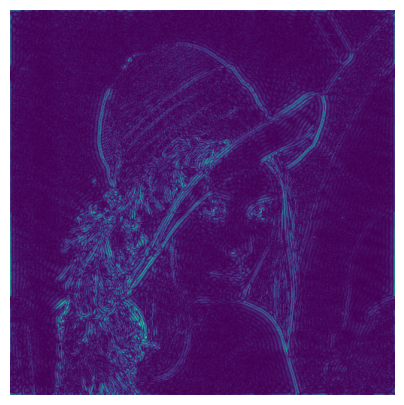

In [28]:
def IdealHighPass(img):
    # image in frequency domain
    F = np.fft.fft2(img)
    Fshift = np.fft.fftshift(F)

    # Filter: Low pass filter
    M,N = img.shape
    H = np.zeros((M,N), dtype=np.float32)
    D0 = 50
    for u in range(M):
        for v in range(N):
            D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
            if D <= D0:
                H[u,v] = 1
            else:
                H[u,v] = 0             
    # Filter: High pass filter
    H = 1 - H
    # Ideal High Pass Filtering
    Gshift = Fshift * H
    # Inverse Fourier Transform
    G = np.fft.ifftshift(Gshift)
    g = np.abs(np.fft.ifft2(G))
    return g

img= cv2.imread("C:/Users/mahamedhat/Downloads/lina.jpeg")
img = rgbtogray(img)
g= IdealHighPass(img)
display(g)


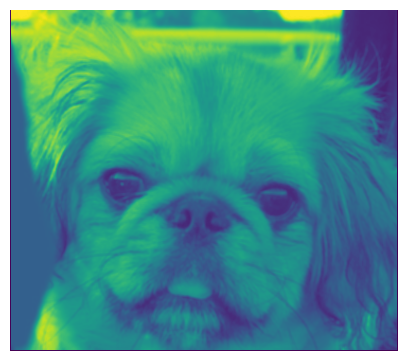

In [15]:
def meanLowPass(img):
    # Obtain number of rows and columns 
    # of the image
    m, n = img.shape

    # Develop Averaging filter(3, 3) mask
    mask = np.ones([3, 3], dtype = int)
    mask = mask / 9

    # Convolve the 3X3 mask over the image 
    img_new = np.zeros([m, n])

    for i in range(1, m-1):
        for j in range(1, n-1):
            temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2]

            img_new[i, j]= temp

    img_new = img_new.astype(np.uint8)
    return img_new

img= cv2.imread("E://THIRD YEAR//Second term//cv//tasks//Task1_cv//server//static//assests//image1.jpg",0)
g= meanLowPass(img)
display(g)




In [16]:
#function gray scale 
def rgbtogray(image):
    r,g,b=image[:,:,0],image[:,:,1],image[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray


In [17]:
# img= cv2.imread("C://Users//mahamedhat//OneDrive//Pictures//1.jpg")
# img = rgbtogray(img)
# display(img)

In [ ]:
def sobel(img):
    # sobel kernel
    sobel_x = np.array([[-1, -2, -1],
                        [ 0,  0,  0],
                        [ 1,  2,  1]])

    sobel_y = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]])
    # partial derivative in x-direction
    edge_x = cv2.filter2D(src=img, ddepth=-1, kernel=sobel_x)
    edge_x[edge_x != 0] = 255


    # partial derivative in y-direction
    edge_y = cv2.filter2D(src=img, ddepth=-1, kernel=sobel_y)
    edge_y[edge_y != 0] = 255


    # combinte the x and y edge
    add_edge = edge_x + edge_y
    add_edge[add_edge != 0] = 255
    return add_edge



In [ ]:
img= cv2.imread('server//static//assests//image1.jpg')
img = rgbtogray(img)
g= sobel(img)
display(g)


TypeError: 'NoneType' object is not subscriptable

In [18]:
def convolve(X, F):
    # height and width of the image
    X_height = X.shape[0]
    X_width = X.shape[1]
    
    # height and width of the filter
    F_height = F.shape[0]
    F_width = F.shape[1]
    
    H = (F_height - 1) // 2
    W = (F_width - 1) // 2
    
    #output numpy matrix with height and width
    out = np.zeros((X_height, X_width))
    #iterate over all the pixel of image X
    for i in np.arange(H, X_height-H):
        for j in np.arange(W, X_width-W):
            sum = 0
            #iterate over the filter
            for k in np.arange(-H, H+1):
                for l in np.arange(-W, W+1):
                    #get the corresponding value from image and filter
                    a = X[i+k, j+l]
                    w = F[H+k, W+l]
                    sum += (w * a)
            out[i,j] = sum
    #return convolution  
    return out

def robert(img):
    roberts_cross_v = np.array( [[ 0, 0, 0 ],
                             [ 0, 1, 0 ],
                             [ 0, 0,-1 ]] )

    roberts_cross_h = np.array( [[ 0, 0, 0 ],
                             [ 0, 0, 1 ],
                             [ 0,-1, 0 ]] )
    vertical = ndimage.convolve( img, roberts_cross_v )
    horizontal = ndimage.convolve( img, roberts_cross_h )
    edged_img = np.sqrt( np.square(horizontal) + np.square(vertical))
    return edged_img

img= cv2.imread('image.png',0)
g= robert(img)
display(g)

    

RuntimeError: filter weights array has incorrect shape.

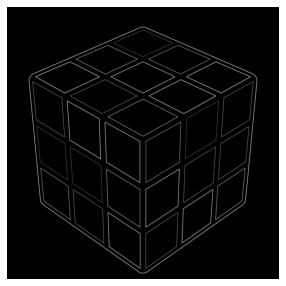

In [ ]:
def prewit(img):
    #define horizontal and Vertical sobel kernels
    Hx = np.array([[-1, 0, 1],[-1, 0, 1],[-1, 0, 1]])
    Hy = np.array([[-1, -1, -1],[0, 0, 0],[1, 1, 1]])
    #normalizing the vectors
    pre_x = convolve(img, Hx) / 6.0
    pre_y = convolve(img, Hy) / 6.0
    #calculate the gradient magnitude of vectors
    pre_out = np.sqrt(np.power(pre_x, 2) + np.power(pre_y, 2))
    # mapping values from 0 to 255
    pre_out = (pre_out / np.max(pre_out)) * 255
    return pre_out

img= cv2.imread('image.png',0)
g= prewit(img)
display(g)


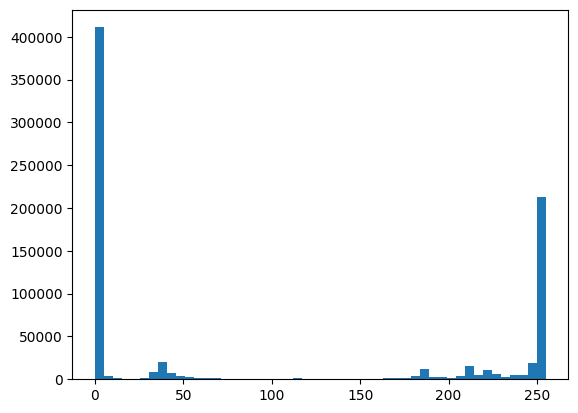

In [4]:
def histogram(img):
    # convert our image into a numpy array
    img = np.asarray(img)

    # put pixels in a 1D array by flattening out img array
    flat = img.flatten()

    # show the histogram
    plt.hist(flat, bins=50)
    
image = cv2.imread("D:/SBME/Task1_cv/server/static/assests/image1.jpg")
histogram(image)

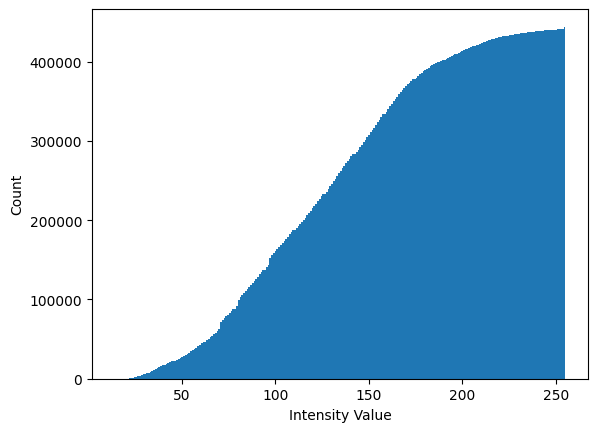

In [20]:
def cumm_dist(img):
    plt.hist(image.ravel(), bins = 256, cumulative = True)
    plt.xlabel('Intensity Value')
    plt.ylabel('Count') 
    plt.show()
    
image = io.imread("E://THIRD YEAR//Second term//cv//tasks//Task1_cv//server//static//assests//image1.jpg")
cumm_dist(image)

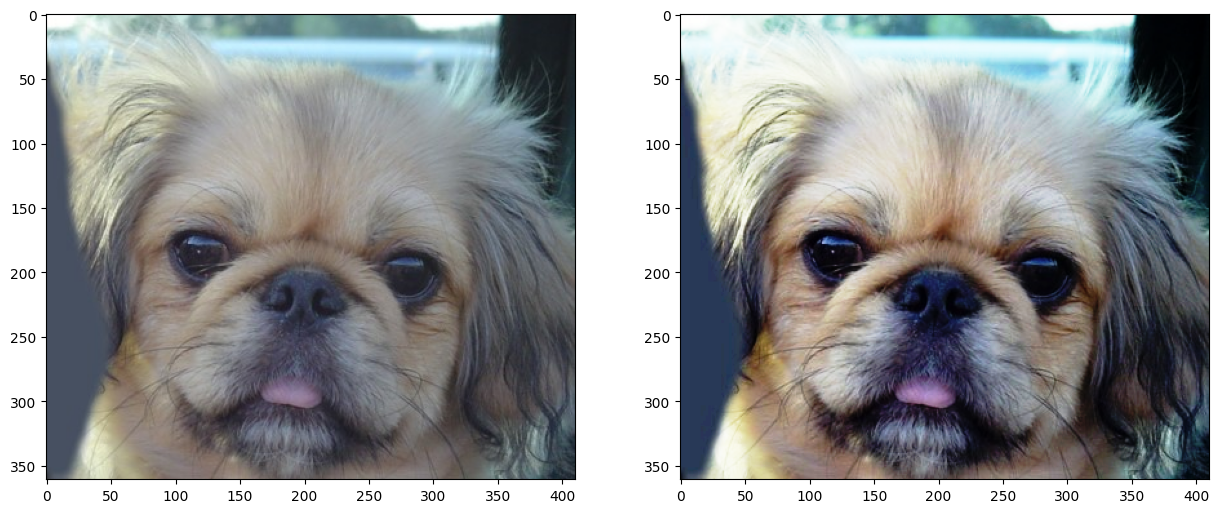

In [21]:
# create our own histogram function
def get_histogram(image, bins):
    # array with size of bins, set to zeros
    histogram = np.zeros(bins)
    
    # loop through pixels and sum up counts of pixels
    for pixel in image:
        histogram[pixel] += 1
    
    # return our final result
    return histogram

# create our cumulative sum function
def cumsum(a):
    a = iter(a)
    b = [next(a)]
    for i in a:
        b.append(b[-1] + i)
    return np.array(b)

def equalization(path):
    img = Image.open(path)

    # convert image into a numpy array
    img = np.asarray(img)
    # put pixels in a 1D array by flattening out img array
    flat = img.flatten()
    # re-normalize cumsum values to be between 0-255
    hist = get_histogram(flat, 256)
    cs = cumsum(hist)
    # numerator & denomenator
    nj = (cs - cs.min()) * 255
    N = cs.max() - cs.min()



    # re-normalize the cdf
    cs = nj / N
    # cast it back to uint8 since we can't use floating point values in images
    cs = cs.astype('uint8')
    # get the value from cumulative sum for every index in flat, and set that as img_new
    img_new = cs[flat]
    # put array back into original shape since we flattened it
    img_new = np.reshape(img_new, img.shape)
    # set up side-by-side image display
    fig = plt.figure()
    fig.set_figheight(15)
    fig.set_figwidth(15)

    fig.add_subplot(1,2,1)
    plt.imshow(img, cmap='gray')

    # display the new image
    fig.add_subplot(1,2,2)
    plt.imshow(img_new, cmap='gray')

    plt.show(block=True)


equalization("E://THIRD YEAR//Second term//cv//tasks//Task1_cv//server//static//assests//image1.jpg")

In [ ]:
def normalize(path):
    img = cv.imread(path)
    norm_img = np.zeros((800,800))
    final_img = cv.normalize(img,  norm_img, 0, 255, cv.NORM_MINMAX)
    cv.imshow('Normalized Image', final_img)
    cv.imwrite('city_normalized.jpg', final_img)
    cv.waitKey(0)
    cv.destroyAllWindows()
    
normalize('low.png')